In [1]:
from tensorflow import keras
from Skripsi import Preprocessing
from Skripsi import Evaluation
from Skripsi import LSTMUnit
from Skripsi2 import Preprocessing as Preprocessing1
from pandas import read_csv
from pandas import DataFrame
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
btc_dfd = pd.read_csv('../Dataset/Binance_BTCUSDT_1h.csv')
df = Preprocessing.feature_selection(btc_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, btc_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
btc_train_X, btc_train_y = Preprocessing.create_dataset(train,25)
btc_test_X, btc_test_y = Preprocessing.create_dataset(test,25)

duplicate ok
No missing value


In [3]:
sorted_df = btc_dfd.sort_values(by=['Date']).copy()
date = sorted_df['Date']
date_test = date.loc[5229:]
date_test.shape

(5230,)

In [4]:
type(date_test.values.tolist())

list

In [5]:
df_no_dup = Preprocessing1.handle_duplicate(btc_dfd)
df = Preprocessing1.feature_selection(df_no_dup)
miss = Preprocessing1.handle_missing_value(df)
x, btc_scaler = Preprocessing1.minmax_scale(miss)
train, test = Preprocessing1.splitting_data(x)
btc_train_X_uni, btc_train_y_uni = Preprocessing1.create_dataset(train,25)
btc_test_X_uni, btc_test_y_uni = Preprocessing1.create_dataset(test,25)

duplicate ok
No missing value


In [6]:
test.shape

(5255, 1)

In [7]:
eth_dfd = pd.read_csv('../Dataset/Binance_ETHUSDT_1h.csv')
df = Preprocessing.feature_selection(eth_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, eth_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
eth_train_X, eth_train_y = Preprocessing.create_dataset(train,25)
eth_test_X, eth_test_y = Preprocessing.create_dataset(test,25)

duplicate ok
No missing value


In [8]:
df_no_dup = Preprocessing1.handle_duplicate(eth_dfd)
df = Preprocessing1.feature_selection(df_no_dup)
miss = Preprocessing1.handle_missing_value(df)
x, eth_scaler = Preprocessing1.minmax_scale(miss)
train, test = Preprocessing1.splitting_data(x)
eth_train_X_uni, eth_train_y_uni = Preprocessing1.create_dataset(train,25)
eth_test_X_uni, eth_test_y_uni = Preprocessing1.create_dataset(test,25)

duplicate ok
No missing value


In [9]:
ltc_dfd = pd.read_csv('../Dataset/Binance_LTCUSDT_1h.csv')
df = Preprocessing.feature_selection(ltc_dfd)
df_no_dup = Preprocessing.handle_duplicate(df)
miss = Preprocessing.handle_missing_value(df_no_dup)
x, ltc_scaler = Preprocessing.minmax_scale(df_no_dup)
train, test = Preprocessing.splitting_data(x)
ltc_train_X, ltc_train_y = Preprocessing.create_dataset(train,25)
ltc_test_X, ltc_test_y = Preprocessing.create_dataset(test,25)

duplicate ok
No missing value


In [10]:
df_no_dup = Preprocessing1.handle_duplicate(ltc_dfd)
df = Preprocessing1.feature_selection(df_no_dup)
miss = Preprocessing1.handle_missing_value(df)
x, ltc_scaler = Preprocessing1.minmax_scale(miss)
train, test = Preprocessing1.splitting_data(x)
ltc_train_X_uni, ltc_train_y_uni = Preprocessing1.create_dataset(train,25)
ltc_test_X_uni, ltc_test_y_uni = Preprocessing1.create_dataset(test,25)

duplicate ok
No missing value


In [11]:
best_lstm_btc = keras.models.load_model('../Model LSTM BTC/LSTM_BTC(64, 100, 60).h5')
best_bilstm_btc = keras.models.load_model('../Model BiLSTM BTC/BiLSTM_BTC(64, 50, 50).h5')
best_lstm_eth = keras.models.load_model('../Model LSTM ETH/LSTM_ETH(32, 100, 100).h5')
best_bilstm_eth = keras.models.load_model('../Model BiLSTM ETH/BiLSTM_ETH(32, 100, 50).h5')
best_lstm_ltc = keras.models.load_model('../Model LSTM LTC/LSTM_LTC(32, 100, 60).h5')
best_bilstm_ltc = keras.models.load_model('../Model BiLSTM LTC/BiLSTM_LTC(32, 100, 100).h5')
best_lstm_btc_uni = keras.models.load_model('../Training Close/LSTM_BTC(64, 100, 60).h5')
best_bilstm_btc_uni = keras.models.load_model('../Training Close/BiLSTM_BTC(64, 50, 50).h5')
best_lstm_eth_uni = keras.models.load_model('../Training Close/LSTM_ETH(32, 100, 100).h5')
best_bilstm_eth_uni = keras.models.load_model('../Training Close/BiLSTM_ETH(32, 100, 50).h5')
best_lstm_ltc_uni = keras.models.load_model('../Training Close/LSTM_LTC(32, 100, 60).h5')
best_bilstm_ltc_uni = keras.models.load_model('../Training Close/BiLSTM_LTC(32, 100, 100).h5')

Metal device set to: Apple M1


2023-05-15 12:04:08.401554: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-15 12:04:08.401665: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [12]:
btc_inv_y = Preprocessing.inverse_scaler(btc_test_y.reshape(-1,1), btc_scaler)
eth_inv_y = Preprocessing.inverse_scaler(eth_test_y.reshape(-1,1), eth_scaler)
ltc_inv_y = Preprocessing.inverse_scaler(ltc_test_y.reshape(-1,1), ltc_scaler)

In [13]:
test_x2 = btc_test_X
yhat = best_lstm_btc.predict(test_x2)
inv_yhat_lstm_btc = Preprocessing.inverse_scaler(yhat, btc_scaler)
print(inv_yhat_lstm_btc)
print("Neurons: "+str(best_lstm_btc.layers[0].units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_lstm_btc))
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_lstm_btc))
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_lstm_btc))

2023-05-15 12:04:10.336328: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-05-15 12:04:10.425573: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:10.454506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 4ms/step
[[28436.727]
 [28558.537]
 [28666.78 ]
 ...
 [17012.168]
 [16986.375]
 [16946.941]]
Neurons: 60
RMSE
286.98833758511716
MAE
243.5471921755498
MAPE
1.2677554190412317


In [14]:
btc_inv_y

array([[28685.95],
       [28819.2 ],
       [28833.13],
       ...,
       [16548.28],
       [16520.81],
       [16542.4 ]])

In [15]:
test_x2 = btc_test_X
yhat = best_bilstm_btc.predict(test_x2)
inv_yhat_bilstm_btc = Preprocessing.inverse_scaler(yhat, btc_scaler)
print(inv_yhat_bilstm_btc)
print("Neurons: "+str(best_bilstm_btc.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_bilstm_btc))
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_bilstm_btc))
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_bilstm_btc))

  7/164 [>.............................] - ETA: 1s 

2023-05-15 12:04:11.488854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:11.534637: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:11.542959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 8ms/step
[[28477.758]
 [28540.973]
 [28663.545]
 ...
 [17046.94 ]
 [17036.066]
 [17005.52 ]]
Neurons: 50
RMSE
291.5029133001788
MAE
243.94411593271965
MAPE
1.2705413719911327


In [16]:
test_x2 = eth_test_X
yhat = best_lstm_eth.predict(test_x2)
inv_yhat_lstm_eth = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_lstm_eth.layers[0].units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_lstm_eth))
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_lstm_eth))
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_lstm_eth))

 20/164 [==>...........................] - ETA: 0s

2023-05-15 12:04:13.160285: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:13.188333: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 5ms/step
Neurons: 100
RMSE
15.93485248963505
MAE
10.953200516943262
MAPE
0.7500023204733112


In [17]:
test_x2 = eth_test_X
yhat = best_bilstm_eth.predict(test_x2)
inv_yhat_bilstm_eth = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_bilstm_eth.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_bilstm_eth))
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_bilstm_eth))
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_bilstm_eth))

  1/164 [..............................] - ETA: 47s

2023-05-15 12:04:14.304753: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:14.351395: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:14.360426: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 9ms/step
Neurons: 50
RMSE
15.993382547719365
MAE
11.169022661664973
MAPE
0.7691197679091978


In [18]:
test_x2 = ltc_test_X
yhat = best_lstm_ltc.predict(test_x2)
inv_yhat_lstm_ltc = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_lstm_ltc.layers[0].units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_lstm_ltc))
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_lstm_ltc))
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_lstm_ltc))

 24/164 [===>..........................] - ETA: 0s

2023-05-15 12:04:16.068365: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:16.093988: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 4ms/step
Neurons: 60
RMSE
0.5846437505644038
MAE
0.38208781421435284
MAPE
0.6428556579319512


In [19]:
test_x2 = ltc_test_X
yhat = best_bilstm_ltc.predict(test_x2)
inv_yhat_bilstm_ltc = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_bilstm_ltc.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_bilstm_ltc))
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_bilstm_ltc))
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_bilstm_ltc))

  1/164 [..............................] - ETA: 47s

2023-05-15 12:04:17.063065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:17.110537: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:17.118855: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 9ms/step
Neurons: 100
RMSE
0.5927119931300765
MAE
0.3964886591019633
MAPE
0.6673328773316621


In [20]:
test_x2.shape

(5230, 25, 5)

In [21]:
test_x2 = btc_test_X_uni
yhat = best_lstm_btc_uni.predict(test_x2)
inv_yhat_lstm_btc_uni = Preprocessing.inverse_scaler(yhat, btc_scaler)
print("Neurons: "+str(best_lstm_btc_uni.layers[0].units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_lstm_btc_uni))
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_lstm_btc_uni))
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_lstm_btc_uni))

 23/164 [===>..........................] - ETA: 0s

2023-05-15 12:04:18.856985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:18.884700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 4ms/step
Neurons: 60
RMSE
414.9468679615335
MAE
377.9278166900693
MAPE
1.974512057781146


In [22]:
test_x2 = btc_test_X_uni
yhat = best_bilstm_btc_uni.predict(test_x2)
inv_yhat_bilstm_btc_uni = Preprocessing.inverse_scaler(yhat, btc_scaler)
print("Neurons: "+str(best_bilstm_btc_uni.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(btc_inv_y,inv_yhat_bilstm_btc_uni))
print('MAE')
print(Evaluation.mae(btc_inv_y,inv_yhat_bilstm_btc_uni))
print('MAPE')
print(Evaluation.mape(btc_inv_y,inv_yhat_bilstm_btc_uni))

  7/164 [>.............................] - ETA: 1s  

2023-05-15 12:04:19.961997: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:20.004717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:20.013268: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 9ms/step
Neurons: 50
RMSE
1190.0803325253312
MAE
1122.404832830424
MAPE
5.8600990409130755


In [23]:
test_x2 = eth_test_X_uni
yhat = best_lstm_eth_uni.predict(test_x2)
inv_yhat_lstm_eth_uni = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_lstm_eth_uni.layers[0].units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_lstm_eth_uni))
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_lstm_eth_uni))
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_lstm_eth_uni))

 23/164 [===>..........................] - ETA: 0s

2023-05-15 12:04:21.628436: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:21.654007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 5ms/step
Neurons: 100
RMSE
23.307975042283243
MAE
20.632411088465762
MAPE
1.5155344242331603


In [24]:
test_x2 = eth_test_X_uni
yhat = best_bilstm_eth_uni.predict(test_x2)
inv_yhat_bilstm_eth_uni = Preprocessing.inverse_scaler(yhat, eth_scaler)
print("Neurons: "+str(best_bilstm_eth_uni.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(eth_inv_y,inv_yhat_bilstm_eth_uni))
print('MAE')
print(Evaluation.mae(eth_inv_y,inv_yhat_bilstm_eth_uni))
print('MAPE')
print(Evaluation.mape(eth_inv_y,inv_yhat_bilstm_eth_uni))

  7/164 [>.............................] - ETA: 1s 

2023-05-15 12:04:22.690900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:22.733182: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:22.741689: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 8ms/step
Neurons: 50
RMSE
17.67003938132171
MAE
14.230177656418066
MAPE
1.0076109495806385


In [25]:
test_x2 = ltc_test_X_uni
yhat = best_lstm_ltc_uni.predict(test_x2)
inv_yhat_lstm_ltc_uni = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_lstm_ltc_uni.layers[0].units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_lstm_ltc_uni))
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_lstm_ltc_uni))
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_lstm_ltc_uni))

 24/164 [===>..........................] - ETA: 0s

2023-05-15 12:04:24.334407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:24.360338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 1s 4ms/step
Neurons: 60
RMSE
0.8588553422994142
MAE
0.6420822860396845
MAPE
1.0317123783557842


In [26]:
test_x2 = ltc_test_X_uni
yhat = best_bilstm_ltc_uni.predict(test_x2)
inv_yhat_bilstm_ltc_uni = Preprocessing.inverse_scaler(yhat, ltc_scaler)
print("Neurons: "+str(best_bilstm_ltc_uni.layers[0].layer.units))
print('RMSE')
print(Evaluation.rmse(ltc_inv_y,inv_yhat_bilstm_ltc_uni))
print('MAE')
print(Evaluation.mae(ltc_inv_y,inv_yhat_bilstm_ltc_uni))
print('MAPE')
print(Evaluation.mape(ltc_inv_y,inv_yhat_bilstm_ltc_uni))

  7/164 [>.............................] - ETA: 1s 

2023-05-15 12:04:25.310274: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:25.353305: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-05-15 12:04:25.361748: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


164/164 [==============================] - 2s 9ms/step
Neurons: 100
RMSE
0.679437502737191
MAE
0.49839320102202983
MAPE
0.8287721219630683


In [27]:
x = Preprocessing.inverse_scaler([[0.19242129]], btc_scaler)
x

array([[16542.40008993]])

In [28]:
inv_yhat_lstm_btc.shape

(5230, 1)

In [29]:
date_test

5229    2022-05-28 02:00:00
5228    2022-05-28 03:00:00
5227    2022-05-28 04:00:00
5226    2022-05-28 05:00:00
5225    2022-05-28 06:00:00
               ...         
4       2022-12-31 19:00:00
3       2022-12-31 20:00:00
2       2022-12-31 21:00:00
1       2022-12-31 22:00:00
0       2022-12-31 23:00:00
Name: Date, Length: 5230, dtype: object

In [30]:
date_test.shape

(5230,)

In [31]:
ltc_test_y

array([0.09479979, 0.09635985, 0.0973999 , ..., 0.11697868, 0.11661466,
       0.11674467])

In [32]:
ltc_test_X

array([[[0.0984425 , 0.08866264, 0.09873284, 0.00605067, 0.09427977],
        [0.09454224, 0.08579835, 0.09794087, 0.00786288, 0.09557982],
        [0.09584233, 0.08892303, 0.1000528 , 0.00411582, 0.09791992],
        ...,
        [0.09558231, 0.08501719, 0.09767687, 0.00433742, 0.09453978],
        [0.09454224, 0.0871003 , 0.09846885, 0.00441158, 0.0973999 ],
        [0.09714241, 0.08683991, 0.09846885, 0.0045675 , 0.09453978]],

       [[0.09454224, 0.08579835, 0.09794087, 0.00786288, 0.09557982],
        [0.09584233, 0.08892303, 0.1000528 , 0.00411582, 0.09791992],
        [0.09818248, 0.08840225, 0.10058078, 0.00425213, 0.09635985],
        ...,
        [0.09454224, 0.0871003 , 0.09846885, 0.00441158, 0.0973999 ],
        [0.09714241, 0.08683991, 0.09846885, 0.0045675 , 0.09453978],
        [0.09454224, 0.08501719, 0.09846885, 0.00252454, 0.09479979]],

       [[0.09584233, 0.08892303, 0.1000528 , 0.00411582, 0.09791992],
        [0.09818248, 0.08840225, 0.10058078, 0.00425213, 0.0

In [33]:
ltc_inv_y

array([[61.7 ],
       [62.3 ],
       [62.7 ],
       ...,
       [70.23],
       [70.09],
       [70.14]])

In [34]:
inv_yhat_lstm_ltc

array([[61.492462],
       [61.577927],
       [62.06242 ],
       ...,
       [70.129456],
       [70.00051 ],
       [69.780846]], dtype=float32)

In [35]:
inv_yhat_bilstm_ltc

array([[61.491188],
       [61.532078],
       [62.01253 ],
       ...,
       [70.07341 ],
       [69.95312 ],
       [69.74655 ]], dtype=float32)

In [36]:
date_test.shape

(5230,)

In [37]:
btc_inv_y.shape

(5230, 1)

In [38]:
df_btc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(btc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_btc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_btc)})
df_btc['Date'] = pd.to_datetime(df_btc['Date_string'])
df_btc1 = df_btc.tail(720)
df_btc2 = df_btc.tail(168)
df_btc3 = df_btc.tail(24)
df_eth = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(eth_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_eth), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_eth)})
df_eth['Date'] = pd.to_datetime(df_eth['Date_string'])
df_eth1 = df_eth.tail(720)
df_eth2 = df_eth.tail(168)
df_eth3 = df_eth.tail(24)
df_ltc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(ltc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_ltc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_ltc)})
df_ltc['Date'] = pd.to_datetime(df_ltc['Date_string'])
df_ltc1 = df_ltc.tail(720)
df_ltc2 = df_ltc.tail(168)
df_ltc3 = df_ltc.tail(24)

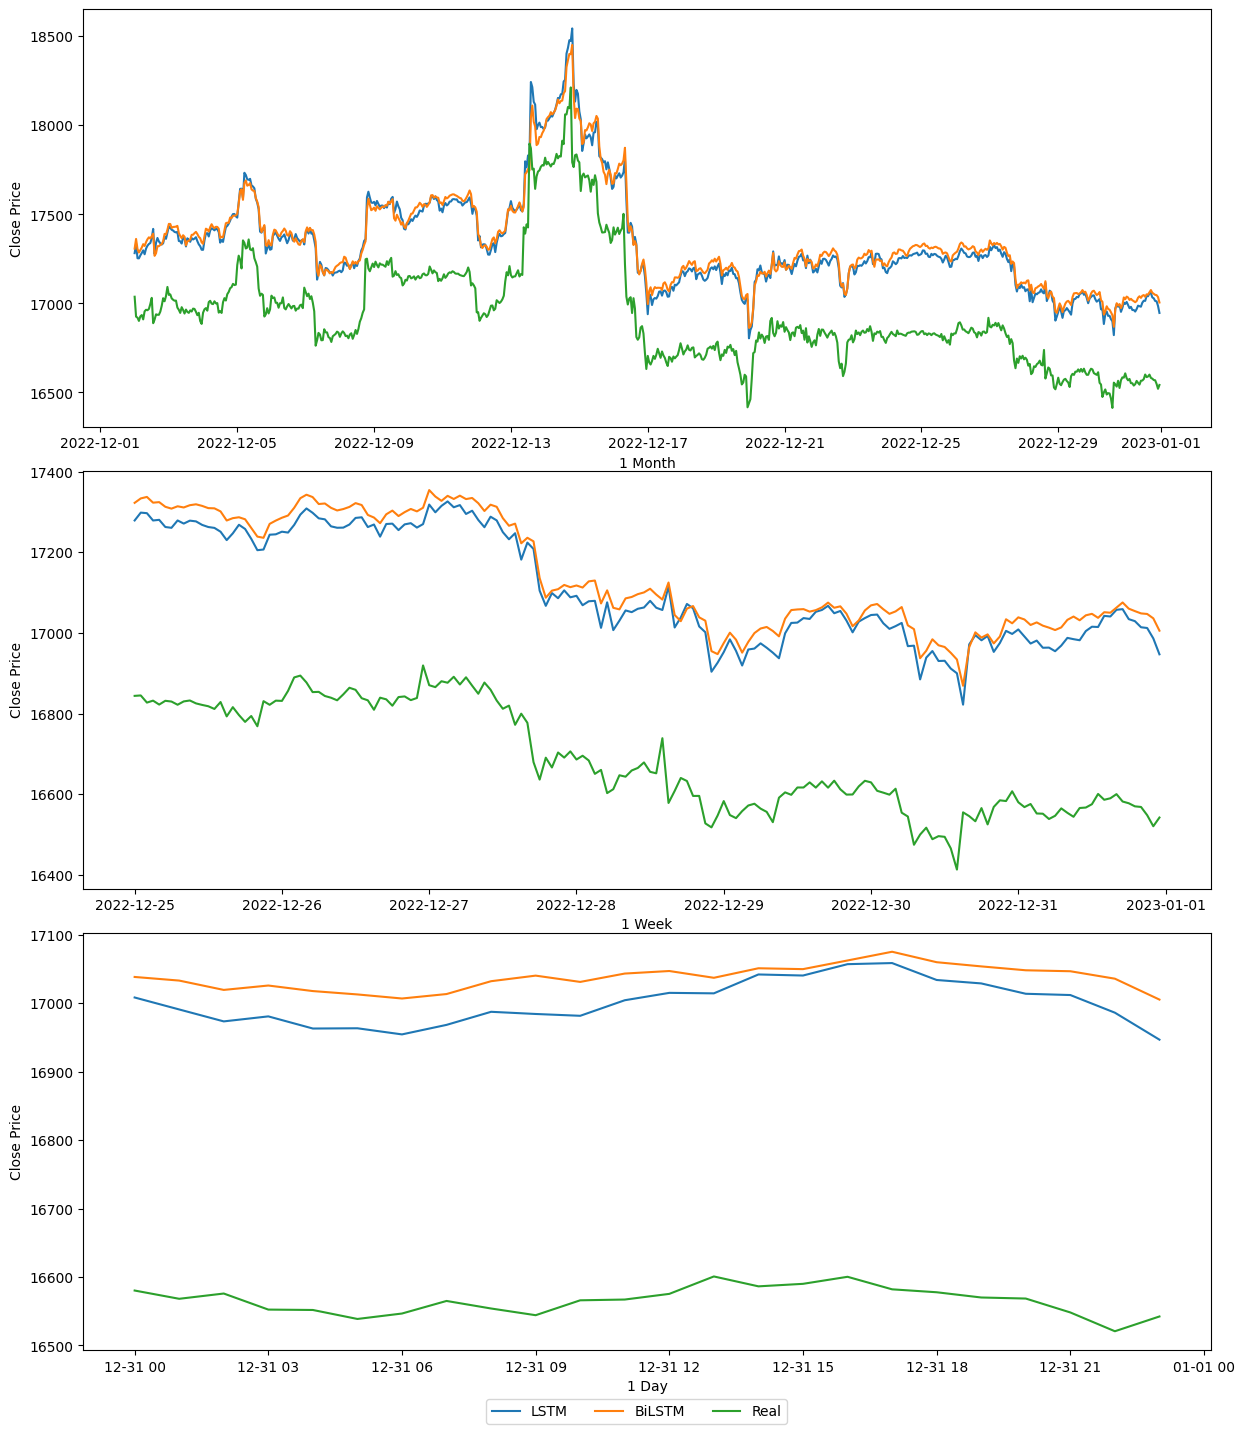

In [39]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_btc1['Date'], df_btc1['Price LSTM'])
axs[0].plot(df_btc1['Date'], df_btc1['Price BiLSTM'])
axs[0].plot(df_btc1['Date'], df_btc1['Real Price'])
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_btc2['Date'], df_btc2['Price LSTM'])
axs[1].plot(df_btc2['Date'], df_btc2['Price BiLSTM'])
axs[1].plot(df_btc2['Date'], df_btc2['Real Price'])
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_btc3['Date'], df_btc3['Price LSTM'])
axs[2].plot(df_btc3['Date'], df_btc3['Price BiLSTM'])
axs[2].plot(df_btc3['Date'], df_btc3['Real Price'])
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.03))
fig.savefig('../../Skripsi/img/predictCompareBTC.png', dpi=300, bbox_inches='tight')

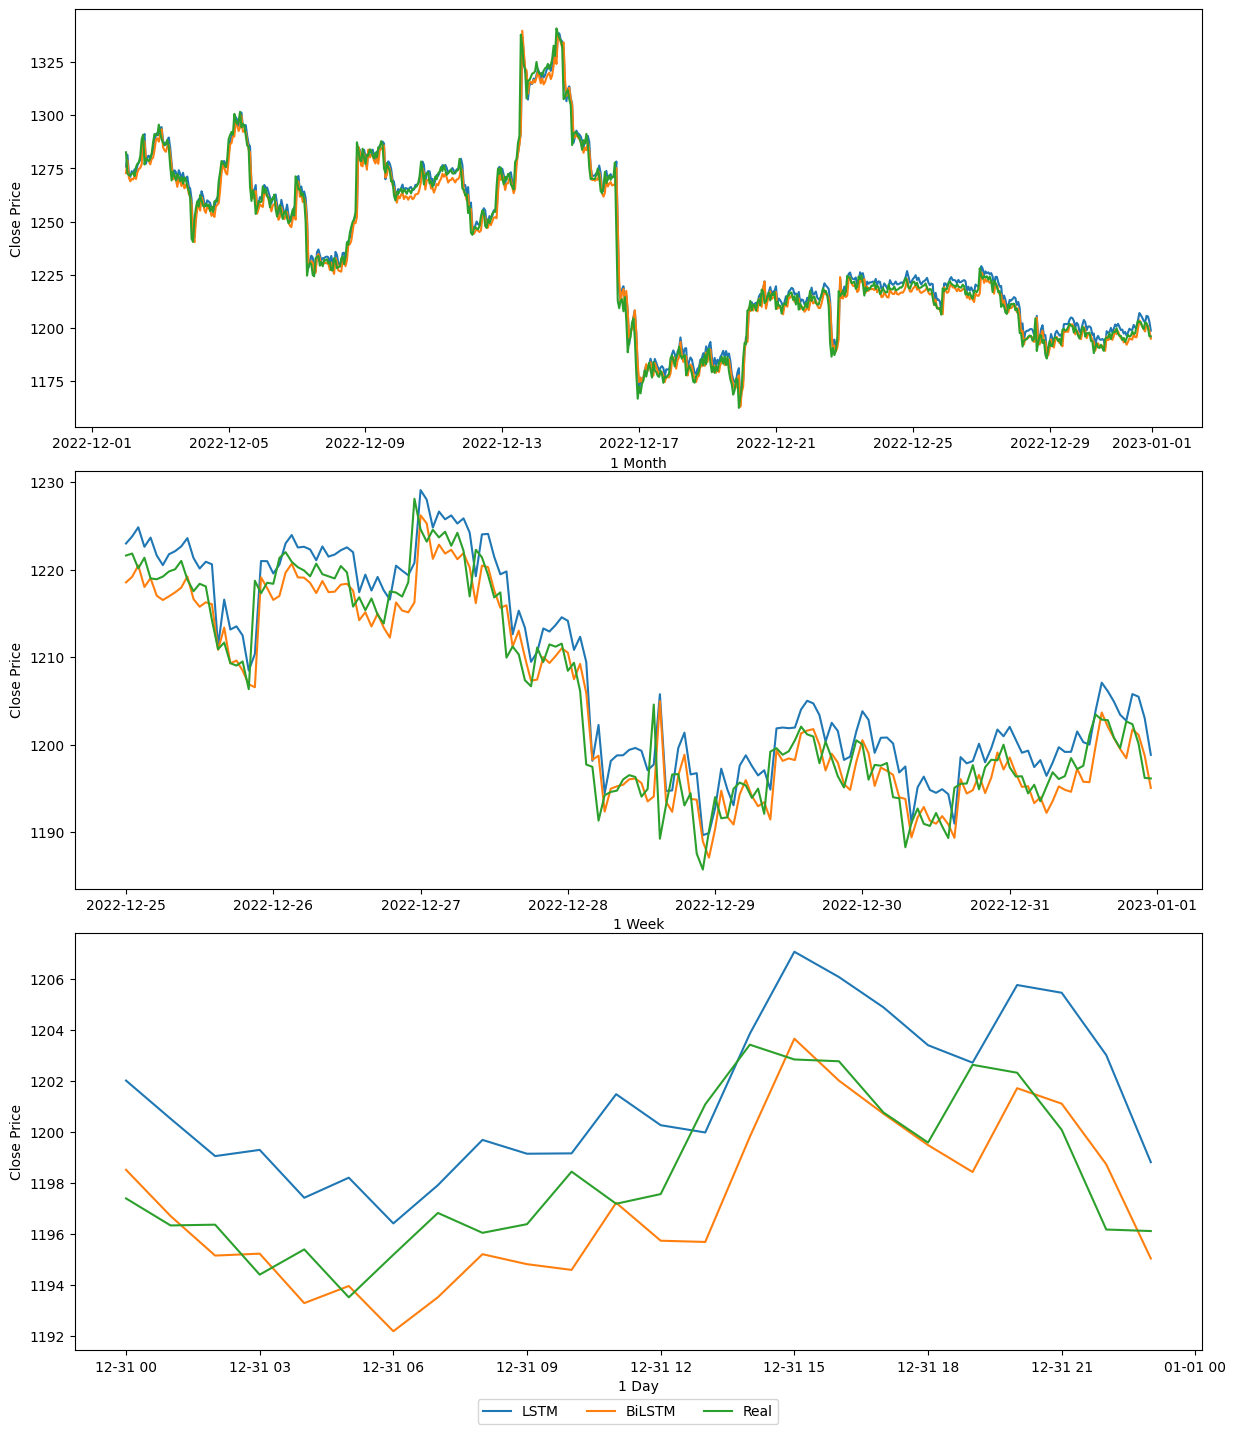

In [40]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_eth1['Date'], df_eth1['Price LSTM'])
axs[0].plot(df_eth1['Date'], df_eth1['Price BiLSTM'])
axs[0].plot(df_eth1['Date'], df_eth1['Real Price'])
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_eth2['Date'], df_eth2['Price LSTM'])
axs[1].plot(df_eth2['Date'], df_eth2['Price BiLSTM'])
axs[1].plot(df_eth2['Date'], df_eth2['Real Price'])
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_eth3['Date'], df_eth3['Price LSTM'])
axs[2].plot(df_eth3['Date'], df_eth3['Price BiLSTM'])
axs[2].plot(df_eth3['Date'], df_eth3['Real Price'])
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.03))
fig.savefig('../../Skripsi/img/predictCompareETH.png', dpi=300, bbox_inches='tight')

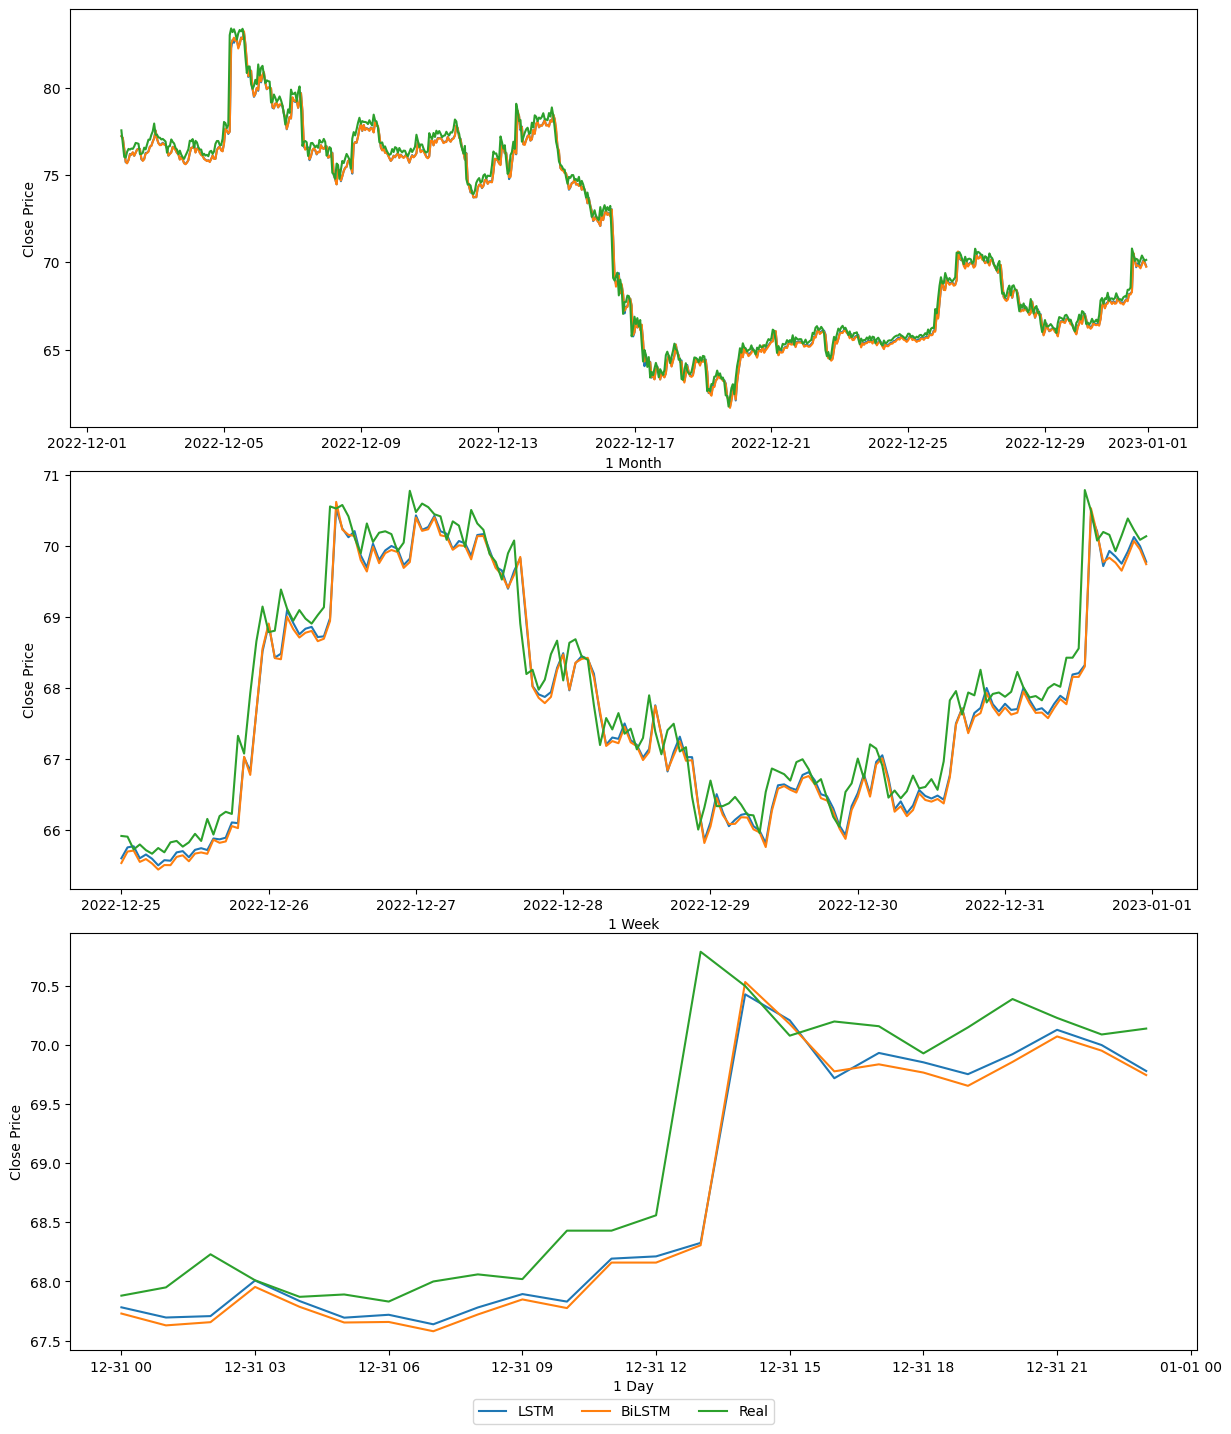

In [41]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_ltc1['Date'], df_ltc1['Price LSTM'])
axs[0].plot(df_ltc1['Date'], df_ltc1['Price BiLSTM'])
axs[0].plot(df_ltc1['Date'], df_ltc1['Real Price'])
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_ltc2['Date'], df_ltc2['Price LSTM'])
axs[1].plot(df_ltc2['Date'], df_ltc2['Price BiLSTM'])
axs[1].plot(df_ltc2['Date'], df_ltc2['Real Price'])
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_ltc3['Date'], df_ltc3['Price LSTM'])
axs[2].plot(df_ltc3['Date'], df_ltc3['Price BiLSTM'])
axs[2].plot(df_ltc3['Date'], df_ltc3['Real Price'])
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['LSTM', 'BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.03))
fig.savefig('../../Skripsi/img/predictCompareLTC.png', dpi=300, bbox_inches='tight')

In [42]:
df_btc_uni = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(btc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_btc_uni), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_btc_uni)})
df_btc_uni['Date'] = pd.to_datetime(df_btc_uni['Date_string'])
df_btc1_uni = df_btc_uni.tail(1440).head(720)
df_btc2_uni = df_btc_uni.tail(1440).head(720).head(168)
df_btc3_uni = df_btc_uni.tail(1440).head(720).tail(168)
df_eth_uni = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(eth_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_eth_uni), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_eth_uni)})
df_eth_uni['Date'] = pd.to_datetime(df_eth_uni['Date_string'])
df_eth1_uni = df_eth_uni.tail(720)
df_eth2_uni = df_eth_uni.tail(168)
df_eth3_uni = df_eth_uni.tail(48)
df_ltc_uni = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(ltc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_ltc_uni), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_ltc_uni)})
df_ltc_uni['Date'] = pd.to_datetime(df_ltc_uni['Date_string'])
df_ltc1_uni = df_ltc_uni.tail(720)
df_ltc2_uni = df_ltc_uni.tail(168)
df_ltc3_uni = df_ltc_uni.tail(48)

df_btc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(btc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_btc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_btc)})
df_btc['Date'] = pd.to_datetime(df_btc['Date_string'])
df_btc1 = df_btc.tail(1440).head(720)
df_btc2 = df_btc.tail(1440).head(720).head(168)
df_btc3 = df_btc.tail(1440).head(720).tail(168)
df_eth = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(eth_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_eth), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_eth)})
df_eth['Date'] = pd.to_datetime(df_eth['Date_string'])
df_eth1 = df_eth.tail(720)
df_eth2 = df_eth.tail(168)
df_eth3 = df_eth.tail(48)
df_ltc = pd.DataFrame({'Date_string': date_test.values, 
                       'Real Price': np.squeeze(ltc_inv_y), 
                       'Price LSTM': np.squeeze(inv_yhat_lstm_ltc), 
                       'Price BiLSTM': np.squeeze(inv_yhat_bilstm_ltc)})
df_ltc['Date'] = pd.to_datetime(df_ltc['Date_string'])
df_ltc1 = df_ltc.tail(720)
df_ltc2 = df_ltc.tail(168)
df_ltc3 = df_ltc.tail(48)

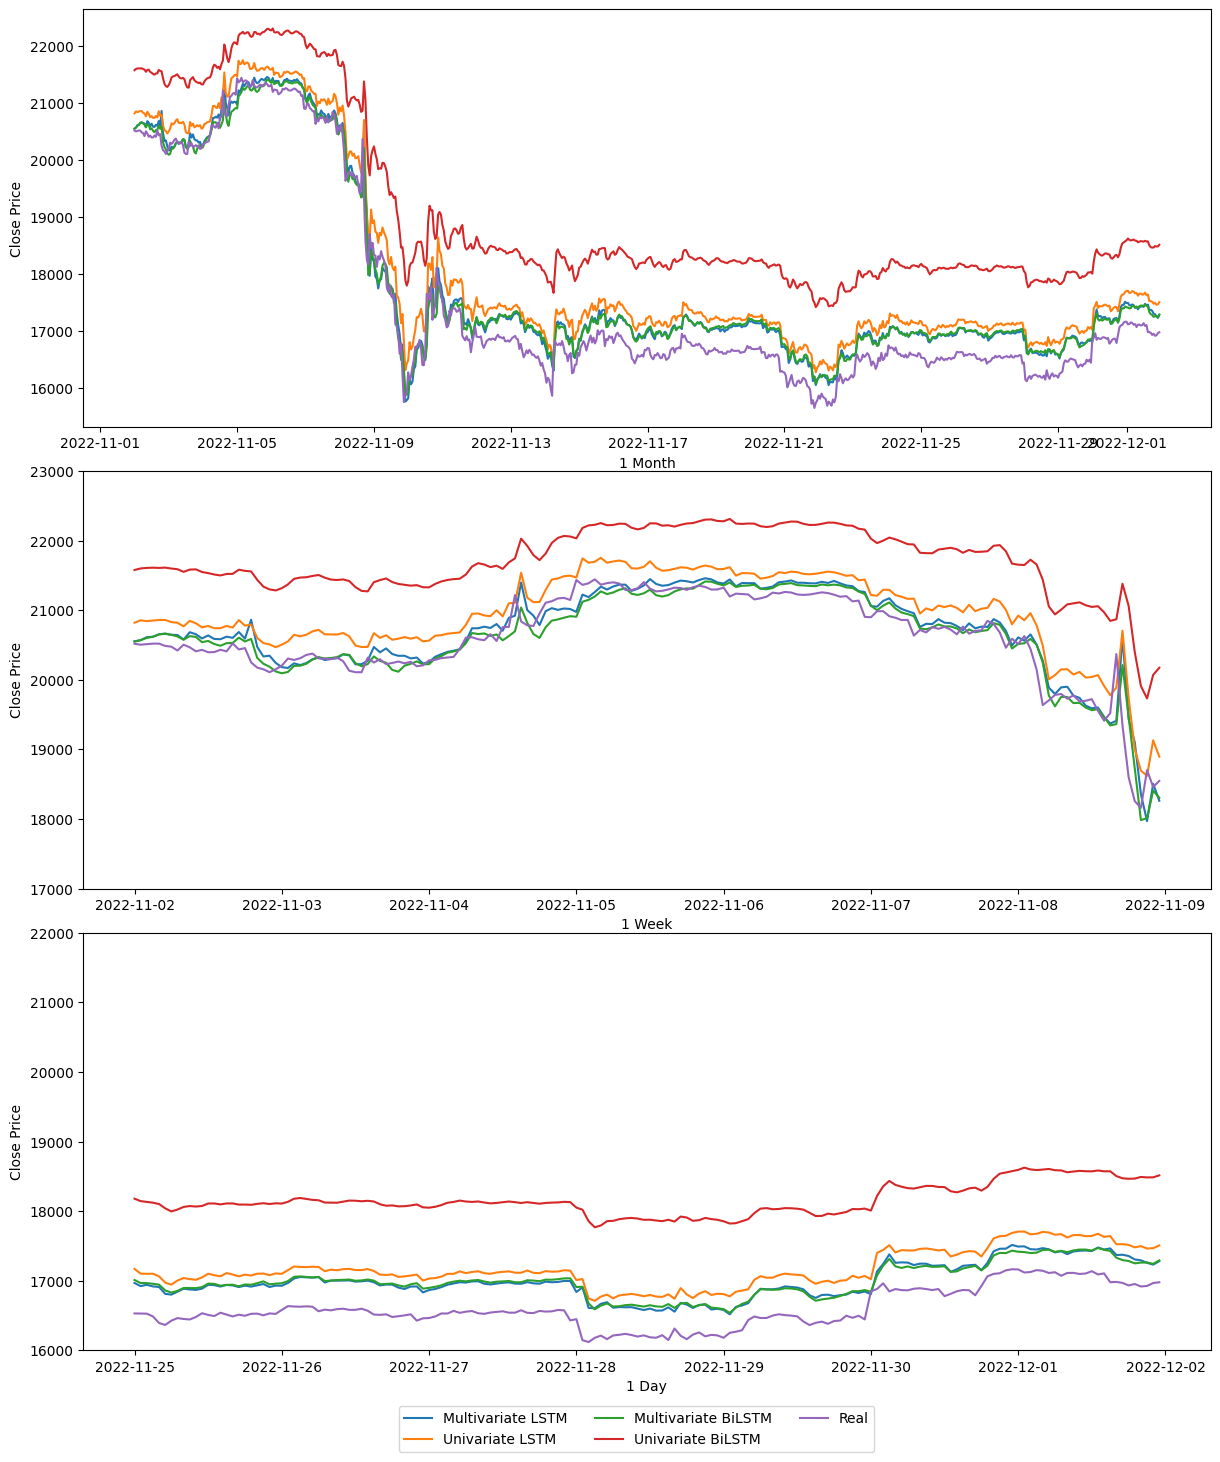

In [56]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_btc1['Date'], df_btc1['Price LSTM'], label='Multivariate LSTM')
axs[0].plot(df_btc1_uni['Date'], df_btc1_uni['Price LSTM'], label='Univariate LSTM')
axs[0].plot(df_btc1['Date'], df_btc1['Price BiLSTM'], label='Multivariate BiLSTM')
axs[0].plot(df_btc1_uni['Date'], df_btc1_uni['Price BiLSTM'], label='Univariate BiLSTM')
axs[0].plot(df_btc1['Date'], df_btc1['Real Price'], label='Real')
# axs[0].legend()
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_btc2['Date'], df_btc2['Price LSTM'])
axs[1].plot(df_btc2_uni['Date'], df_btc2_uni['Price LSTM'])
axs[1].plot(df_btc2['Date'], df_btc2['Price BiLSTM'])
axs[1].plot(df_btc2_uni['Date'], df_btc2_uni['Price BiLSTM'])
axs[1].plot(df_btc2['Date'], df_btc2['Real Price'])
axs[1].set_ylim(17000,23000)
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_btc3['Date'], df_btc3['Price LSTM'])
axs[2].plot(df_btc3_uni['Date'], df_btc3_uni['Price LSTM'])
axs[2].plot(df_btc3['Date'], df_btc3['Price BiLSTM'])
axs[2].plot(df_btc3_uni['Date'], df_btc3_uni['Price BiLSTM'])
axs[2].plot(df_btc3['Date'], df_btc3['Real Price'])
axs[2].set_ylim(16000,22000)
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['Multivariate LSTM', 'Univariate LSTM', 'Multivariate BiLSTM', 'Univariate BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))
fig.savefig('../../Skripsi/img/predictComparLSTMeBTCUniMulti.png', dpi=300, bbox_inches='tight')

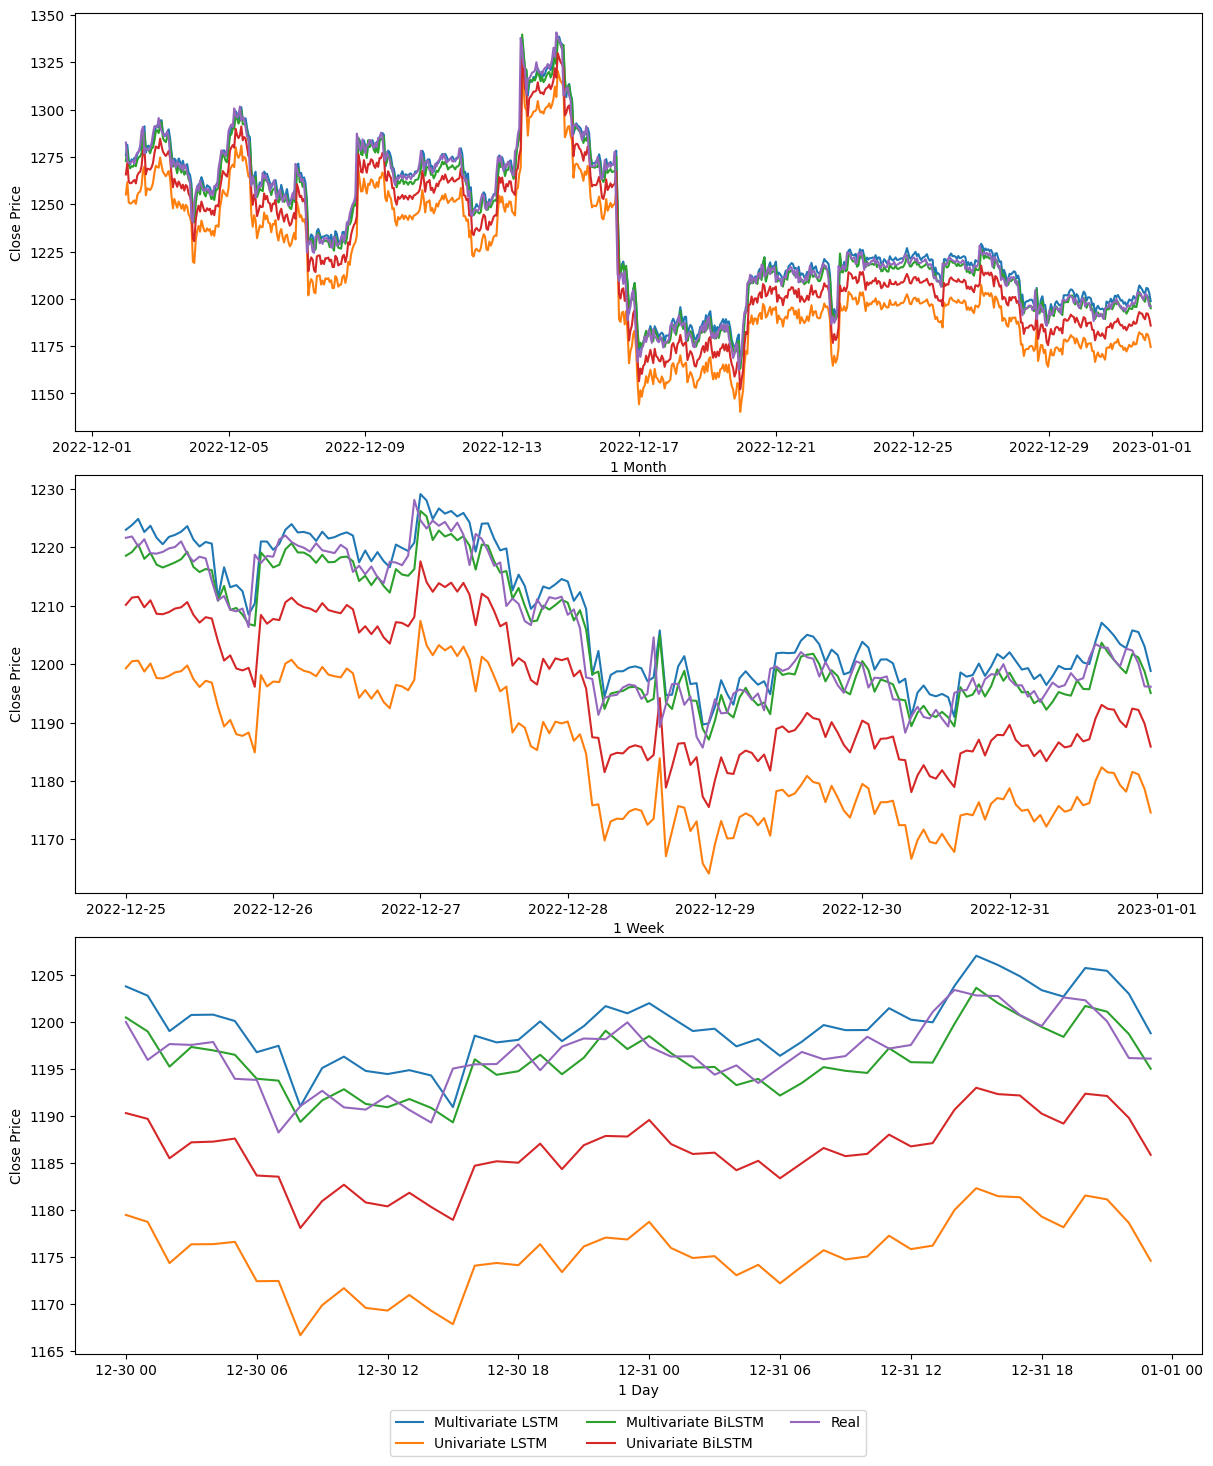

In [44]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_eth1['Date'], df_eth1['Price LSTM'], label='Multivariate LSTM')
axs[0].plot(df_eth1_uni['Date'], df_eth1_uni['Price LSTM'], label='Univariate LSTM')
axs[0].plot(df_eth1['Date'], df_eth1['Price BiLSTM'], label='Multivariate BiLSTM')
axs[0].plot(df_eth1_uni['Date'], df_eth1_uni['Price BiLSTM'], label='Univariate BiLSTM')
axs[0].plot(df_eth1['Date'], df_eth1['Real Price'], label='Real')
# axs[0].legend()
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_eth2['Date'], df_eth2['Price LSTM'])
axs[1].plot(df_eth2_uni['Date'], df_eth2_uni['Price LSTM'])
axs[1].plot(df_eth2['Date'], df_eth2['Price BiLSTM'])
axs[1].plot(df_eth2_uni['Date'], df_eth2_uni['Price BiLSTM'])
axs[1].plot(df_eth2['Date'], df_eth2['Real Price'])
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_eth3['Date'], df_eth3['Price LSTM'])
axs[2].plot(df_eth3_uni['Date'], df_eth3_uni['Price LSTM'])
axs[2].plot(df_eth3['Date'], df_eth3['Price BiLSTM'])
axs[2].plot(df_eth3_uni['Date'], df_eth3_uni['Price BiLSTM'])
axs[2].plot(df_eth3['Date'], df_eth3['Real Price'])
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['Multivariate LSTM', 'Univariate LSTM', 'Multivariate BiLSTM', 'Univariate BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))
fig.savefig('../../Skripsi/img/predictComparLSTMeETHUniMulti.png', dpi=300, bbox_inches='tight')

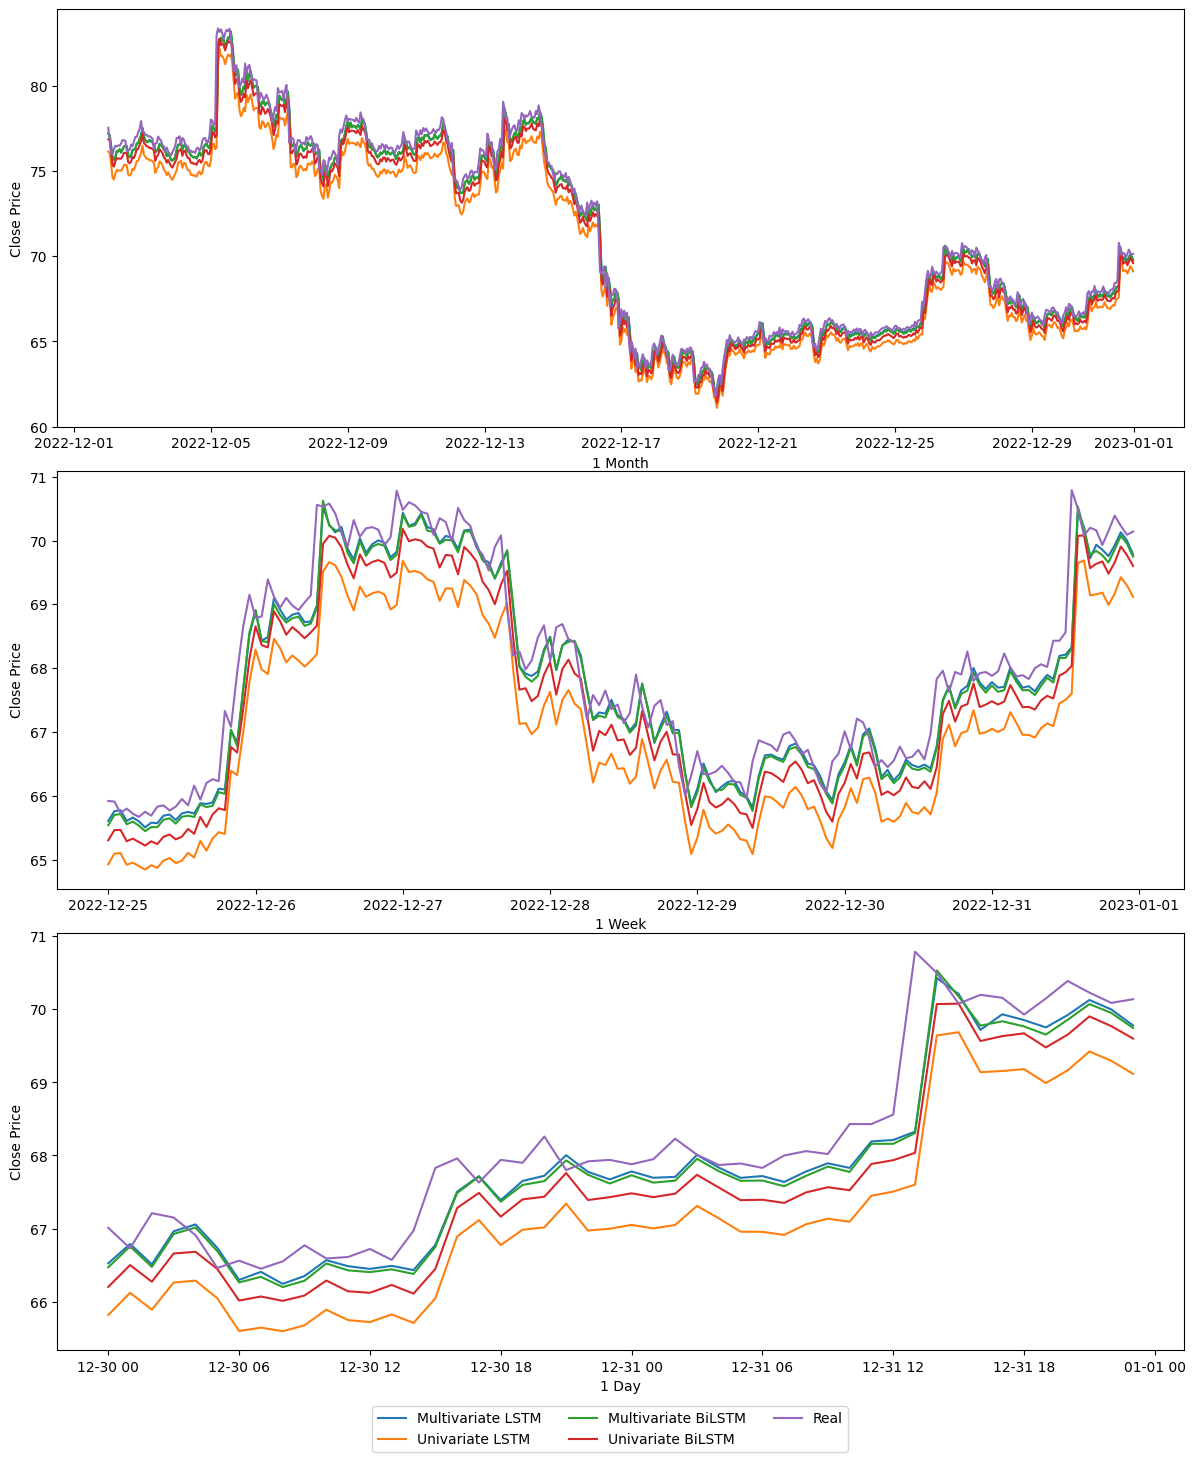

In [45]:
fig, axs = plt.subplots(nrows=3)
fig.set_figwidth(12)
fig.set_figheight(14)
fig.tight_layout()

axs[0].plot(df_ltc1['Date'], df_ltc1['Price LSTM'], label='Multivariate LSTM')
axs[0].plot(df_ltc1_uni['Date'], df_ltc1_uni['Price LSTM'], label='Univariate LSTM')
axs[0].plot(df_ltc1['Date'], df_ltc1['Price BiLSTM'], label='Multivariate BiLSTM')
axs[0].plot(df_ltc1_uni['Date'], df_ltc1_uni['Price BiLSTM'], label='Univariate BiLSTM')
axs[0].plot(df_ltc1['Date'], df_ltc1['Real Price'], label='Real')
# axs[0].legend()
axs[0].set_xlabel('1 Month')
axs[0].set_ylabel('Close Price')
axs[1].plot(df_ltc2['Date'], df_ltc2['Price LSTM'])
axs[1].plot(df_ltc2_uni['Date'], df_ltc2_uni['Price LSTM'])
axs[1].plot(df_ltc2['Date'], df_ltc2['Price BiLSTM'])
axs[1].plot(df_ltc2_uni['Date'], df_ltc2_uni['Price BiLSTM'])
axs[1].plot(df_ltc2['Date'], df_ltc2['Real Price'])
axs[1].set_xlabel('1 Week')
axs[1].set_ylabel('Close Price')
axs[2].plot(df_ltc3['Date'], df_ltc3['Price LSTM'])
axs[2].plot(df_ltc3_uni['Date'], df_ltc3_uni['Price LSTM'])
axs[2].plot(df_ltc3['Date'], df_ltc3['Price BiLSTM'])
axs[2].plot(df_ltc3_uni['Date'], df_ltc3_uni['Price BiLSTM'])
axs[2].plot(df_ltc3['Date'], df_ltc3['Real Price'])
axs[2].set_xlabel('1 Day')
axs[2].set_ylabel('Close Price')
fig.legend(['Multivariate LSTM', 'Univariate LSTM', 'Multivariate BiLSTM', 'Univariate BiLSTM', 'Real'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.05))
fig.savefig('../../Skripsi/img/predictComparLSTMeLTCUniMulti.png', dpi=300, bbox_inches='tight')